In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import os
os.getcwd()

'C:\\Users\\z019157\\OneDrive - Alliance\\Public\\Datackthon'

In [9]:
# **Install imbalanced-learn For Data Ovesampling *

In [10]:
!pip3 install imbalanced-learn
import imblearn
print(imblearn.__version__)

0.8.0


In [25]:
from collections import Counter
#from sklearn.datasets import make_classification
#from imblearn.over_sampling import RandomOverSampler

In [12]:
def compute_metrics(y,y_pred):
  RMSE = mean_squared_error(y, y_pred, squared=False)
  MAE = mean_absolute_error(y, y_pred)
  R2 = r2_score(y,y_pred)
  return RMSE, MAE, R2, "RMSE: "+str(round(RMSE,4))+"   |   MAE: "+str(round(MAE,4))+"   |   R2: "+str(round(R2,4))+"  |   size: "+str(len(y))

In [13]:
root_path = Path("C:\\Users\\z019157\\OneDrive - Alliance\\Public\\Datackthon")
training = root_path / "train_dataset.csv"
Competitionf = root_path / "competition_dataset.csv"
prediction = root_path / "prediction_1.csv"
model = root_path / "model.pkl"
encoderf = root_path / "encoder.pkl"
scalar = root_path / "scalar.pkl"
oversamp = root_path / "oversampletrain.csv"

In [15]:
# **PART 1: Read Training csv and drop the Low importence column from dataframe**

In [16]:
dfin = pd.read_csv(training, sep=";")
dfin = dfin.drop(['JOBID', 'DAY', 'HOUR','NTNU' ,'MPLINK','TZC FINAL'], axis=1)
dfin.shape

(89112, 16)

In [18]:
# **PART 2: Dubligate rows removing using Groupby the columns andfilter the max 'ELAPSEDTIME' on the Group**

In [19]:
dfin = dfin.groupby(['VERSION','PERFORMANCE','PRECISION','MPLINK+NTNU','MBS','RUNEND','TIMESTEP','NBNODES','NBELEM1D','NBELEM2D','NBELEM3D','CLUSTER','NBSERVERS','NBCORE','DATACHECK_TIME'])['ELAPSEDTIME'].max().reset_index()
dfin.head()

,VERSION,PERFORMANCE,PRECISION,MPLINK+NTNU,MBS,RUNEND,TIMESTEP,NBNODES,NBELEM1D,NBELEM2D,NBELEM3D,CLUSTER,NBSERVERS,NBCORE,DATACHECK_TIME,ELAPSEDTIME
0,2012.7,ECE,1,NO,NO,40.01,0.0005,1618559,8878,1513126,175267,HPC1,2.0,48,79.0,7910
1,2012.7,ECE,1,NO,NO,40.01,0.0005,1618559,8878,1513126,175267,HPC1,2.0,48,79.5,7760
2,2012.7,ECE,1,NO,NO,40.01,0.0005,1618559,8878,1513126,175267,HPC1,2.0,48,79.6,7740
3,2012.7,ECE,1,NO,NO,50.01,0.0005,1618554,8880,1513120,175267,HPC1,2.0,48,79.1,10600
4,2012.7,ECE,1,NO,NO,60.01,0.0005,2131168,6777,1992043,409996,HPC1,2.0,48,57.5,8980


In [20]:
dfin.shape

(67334, 16)

In [21]:
# **PART 3: categorical and Encoder**

In [22]:
dfin = dfin.astype({"NBSERVERS": int})
dfin['RUNEND'] = np.ceil(dfin['RUNEND']/dfin['TIMESTEP']).astype(int)
dfin = dfin.drop(["TIMESTEP"], axis=1)
#dfin['DATACHECK_TIME'] = np.log10(dfin['DATACHECK_TIME'])
dfin['DATACHECK_TIME']=np.ceil(dfin['DATACHECK_TIME']).astype(int)
numerical = list(dfin.describe().columns)
categorical = [col for col in dfin.columns if col not in numerical]
encoders = {}
for column in categorical:
  encoder = LabelEncoder().fit(dfin[column])
  dfin[column] = encoder.transform(dfin[column])
  encoders[column]=encoder
dfin.head()

,VERSION,PERFORMANCE,PRECISION,MPLINK+NTNU,MBS,RUNEND,NBNODES,NBELEM1D,NBELEM2D,NBELEM3D,CLUSTER,NBSERVERS,NBCORE,DATACHECK_TIME,ELAPSEDTIME
0,0,1,1,0,0,80020,1618559,8878,1513126,175267,0,2,48,79,7910
1,0,1,1,0,0,80020,1618559,8878,1513126,175267,0,2,48,80,7760
2,0,1,1,0,0,80020,1618559,8878,1513126,175267,0,2,48,80,7740
3,0,1,1,0,0,100020,1618554,8880,1513120,175267,0,2,48,80,10600
4,0,1,1,0,0,120020,2131168,6777,1992043,409996,0,2,48,58,8980


In [23]:
# **PART 4: Oversampling the 'CLUSTER' column using ADASYN**

In [26]:
print(Counter(dfin['CLUSTER']))

Counter({0: 41431, 2: 25897, 1: 6})


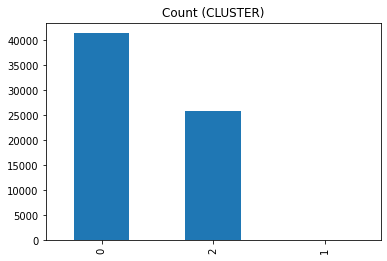

In [27]:
dfinOver = dfin
y = dfinOver["CLUSTER"]
X = dfinOver
dfinOver['CLUSTER'].value_counts().plot(kind='bar', title='Count (CLUSTER)');

In [28]:
from imblearn.over_sampling import ADASYN

# create the object to resample the majority class.
adasyn = ADASYN(sampling_strategy="auto",random_state=0)

# fit the object to the training data.
x_adasyn, y_adasyn = adasyn.fit_resample(X, y)
x_adasyn.to_csv('Train_adasyn.01.csv', index=False, sep=";")

In [29]:
x_adasyn.head()

,VERSION,PERFORMANCE,PRECISION,MPLINK+NTNU,MBS,RUNEND,NBNODES,NBELEM1D,NBELEM2D,NBELEM3D,CLUSTER,NBSERVERS,NBCORE,DATACHECK_TIME,ELAPSEDTIME
0,0,1,1,0,0,80020,1618559,8878,1513126,175267,0,2,48,79,7910
1,0,1,1,0,0,80020,1618559,8878,1513126,175267,0,2,48,80,7760
2,0,1,1,0,0,80020,1618559,8878,1513126,175267,0,2,48,80,7740
3,0,1,1,0,0,100020,1618554,8880,1513120,175267,0,2,48,80,10600
4,0,1,1,0,0,120020,2131168,6777,1992043,409996,0,2,48,58,8980


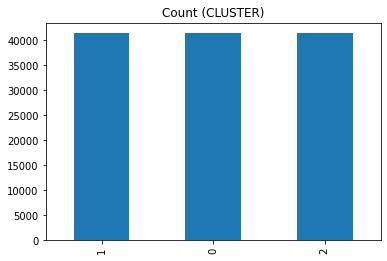

In [30]:
x_adasyn['CLUSTER'].value_counts().plot(kind='bar', title='Count (CLUSTER)');

In [31]:
dfin = x_adasyn
dfin.shape

(124279, 15)

In [32]:
print(Counter(dfin['CLUSTER']))

Counter({1: 41432, 0: 41431, 2: 41416})


In [ ]:
#for column in dfin.columns:
#    dfin.plot(x=column, y="ELAPSEDTIME", kind="scatter")

In [33]:
# **PART 5: Apply Scaler 'MinMaxScaler' and PolynomialFeatures to transform the features**

In [34]:
y = dfin["ELAPSEDTIME"]
X = dfin.drop(["ELAPSEDTIME"], axis=1)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(data = scaler.fit_transform(X), columns = X.columns)
poly = PolynomialFeatures(degree=3)
X_pol =  poly.fit_transform(X_scaled)
X_train_sc, X_test_sc, _, _ = train_test_split(X_pol, y, test_size=0.15, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [35]:
# **PART 6: RandomForestRegressor Train with whole dataframe**

In [ ]:
#rfrpol = RandomForestRegressor(n_estimators=800, random_state=100, min_samples_split=5, min_samples_leaf=1,max_features='sqrt', max_depth=20, bootstrap=True, n_jobs=14, verbose=3).fit(X_pol, y)
rfrpol = RandomForestRegressor(n_estimators=900, random_state=100, min_samples_split=4, min_samples_leaf=1,max_features=0.04, max_depth=30, bootstrap=True, n_jobs=15, verbose=1)
rfrpol.fit(X_pol, y)

[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   47.7s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:  5.8min


In [ ]:
# **Prediction With Competition Data

In [ ]:
dfout = pd.read_csv(Competitionf, sep=";")
dfcomp = dfout.drop(["JOBID", "DAY", "HOUR",'NTNU' ,'MPLINK'], axis=1)
dfcomp = dfcomp.astype({"NBSERVERS": int})
dfcomp['RUNEND'] = np.ceil(dfcomp['RUNEND']/dfcomp['TIMESTEP']).astype(int)
dfcomp = dfcomp.drop(["TIMESTEP"], axis=1)

#dfcomp['RUNEND'] = np.log10(dfcomp['RUNEND'])
#dfcomp['DATACHECK_TIME'] = np.log10(dfcomp['DATACHECK_TIME'])
dfcomp['DATACHECK_TIME']=np.ceil(dfcomp['DATACHECK_TIME']).astype(int)
numerical = list(dfcomp.describe().columns)
categorical = [col for col in dfcomp.columns if col not in numerical]
for column in categorical:
    dfcomp[column] = encoders[column].transform(dfcomp[column])
Xout_scaled = pd.DataFrame(data = scaler.transform(dfcomp), columns = X.columns)
Xout_pol =  poly.fit_transform(Xout_scaled)

In [66]:
dfcomp["prediction"] = rfrpol.predict(Xout_pol)
pred = pd.DataFrame(data=dfout["JOBID"], columns=["JOBID"])
pred["PREDICTION"] = np.ceil(dfcomp["prediction"]).astype(int)
pred.to_csv(prediction, index=False, sep=";")
pred.head()

[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:    1.1s
[Parallel(n_jobs=15)]: Done 900 out of 900 | elapsed:    1.3s finished


,JOBID,PREDICTION
0,4932,17953
1,4930,27566
2,5196,14544
3,5424,10918
4,5202,14853
